In [1]:
import numpy as np
import matplotlib.pyplot as plt


def perceptron(w,x):
    sum = 0
    for i in range(w.shape[0]):
        sum += w[i]*x[i]
    return sum
def perceptronx(w,x):
    sum = 0
    for i in range(w.shape[0]):
        sum += w[i]*x[i]
    return 1/(1 + 2.78**(-sum))
def unit_vector(i, length):
    unit_vector = np.zeros(length)
    unit_vector[i] = 1.0
    return unit_vector

def paramshift(w, x, r, phi, j):
    return r*(perceptron(w + phi*unit_vector(j, w.shape[0]), x) - perceptron(w - phi*unit_vector(j, w.shape[0]), x))

def dperceptron(w,x):
    return x


In [2]:
from sklearn.metrics import mean_squared_error

def cal(n_node):
    errors = []
    for i in range(0, 200):
        w = np.random.rand(n_node)
        x = np.concatenate([np.random.rand(n_node - 1), np.array([1])])

        gradient = dperceptron(w, x)
        psuedo_gradient = np.zeros(w.shape[0])
        for k in range(w.shape[0]):
            psuedo_gradient[k] = paramshift(w, x, 1/(2*np.pi), np.pi, k)

        errors.append(mean_squared_error(gradient, psuedo_gradient))
    return np.mean(errors)

errors = []
for i in range(2, 200):
    errors.append(cal(i))

# nr = 100
# ns = 100
# ss = np.linspace(-10,10, ns)
# rs = 1/2*ss
# min_fidelity, gradient_of_min_fidelity, min_r, min_phase = 10000000000, 0, 0, 0
# fidelity = []
# errors = np.ones((nr, ns))
# for i in range(0, nr):
#     for j in range(0, ns):
#         gradient = dperceptron(w)
#         psuedo_gradient = np.zeros(w.shape[0])
#         for k in range(w.shape[0]):
#             psuedo_gradient[k] = (paramshift(perceptron, w, 1/(2*np.pi), np.pi, k))

#         error = mean_squared_error(gradient, psuedo_gradient)

#         errors[i, j] = error
#         if error < min_fidelity: 
#             min_fidelity = error
#             gradient_of_min_fidelity = gradient
#             min_r = rs[i]
#             min_phase = ss[i]

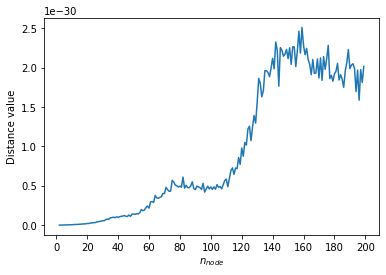

In [3]:
plt.plot(range(2,200), errors)
plt.xticks(range(0,201,20))
plt.xlabel("$n_{node}$")
plt.ylabel("Distance value")
plt.savefig('perceptron.eps', format = 'eps', dpi = 1000)

In [31]:
min_fidelity

0.1984809167895607

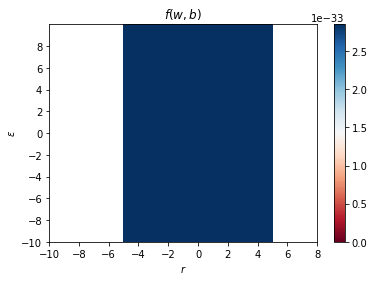

In [37]:
fig, ax = plt.subplots()
c = ax.pcolormesh(rs, ss, errors, cmap='RdBu', vmin=0, vmax=np.nanmax(errors))
ax.set_title('$f(w,b)$')
ax.axis([np.min(rs), np.max(rs), np.min(ss),np.max(ss)])
plt.xlabel('$r$')
plt.ylabel('$\epsilon$')
plt.xticks(range(-10, 10, 2))
plt.yticks(range(-10, 10, 2))
fig.colorbar(c, ax=ax)
#plt.savefig('logx.eps', format = 'eps')

In [77]:
nrs = list(range(1, 51))
nss = list(range(1, 51))
min_fidilities = np.ones((50, 50))
for nr in nrs: 
    for ns in nss:
        rs = np.linspace(-10,10, nr)
        ss = np.linspace(-5,5, ns)
        min_fidelity, gradient_of_min_fidelity, min_r, min_phase = 10000000000, 0, 0, 0
        fidelity = []
        errors = np.ones((nr, ns))
        for i in range(0, nr):
            for j in range(0, ns):
                x = np.random.normal(10, 5)
                gradient = dfunc(x)
                psuedogradient = paramshift(func, x, rs[i], ss[j])
                error = np.abs(gradient - psuedogradient)
                errors[i, j] = error
                if error < min_fidelity: 
                    min_fidelity = error
                    gradient_of_min_fidelity = gradient
                    min_r = rs[i]
                    min_phase = ss[j]
        min_fidilities[nr - 1, ns - 1] = min_fidelity

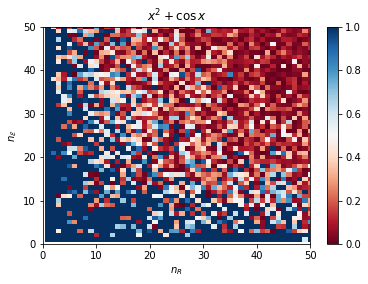

In [83]:

fig, ax = plt.subplots()

c = ax.pcolormesh(nrs, nss, min_fidilities, cmap='RdBu', vmin=0, vmax=1)
ax.set_title('$x^2 + \cos x $')
# set the limits of the plot to the limits of the data
ax.axis([np.min(nrs), np.max(nrs), np.min(nss),np.max(nss)])
plt.xlabel('$n_R$')
plt.ylabel('$n_{\mathcal{E}}$')
plt.xticks(range(0, 51, 10))
plt.yticks(range(0, 51, 10))
fig.colorbar(c, ax=ax)
plt.savefig('share.eps', format = 'eps')

In [ ]:
ae = []
re = []
reals = []
fakes = []
for i in range(0, 100):
    x = np.random.normal(10, 5)
    reals.append(dfunc(x))
    fakes.append(paramshift(func, x, min_r, min_phase))
    re.append(np.abs(dfunc(x)-paramshift(func, x, min_r, min_phase))/(dfunc(x)))
plt.plot(range(0,100), reals, label="Exact gradient")
plt.plot(range(0,100), fakes, label="Approximate gradient")
plt.legend(loc='lower left', borderaxespad=0.)
plt.show()
print(min_r)
print(min_phase)
print(min_fidelity)
print(np.average(re))
